# 1.Project Planning

- first : examine dataset(kaggle dataset), create project
- second : solve problem(interesting project ideas), collect data

# 2.Data Collection

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException

import time
import pandas as pd

In [12]:
def get_jobs(keyword, num_jobs, verbose):
    
    '''Gathers jobs as a dataframe, scraped from Glassdoor'''
    
    #Initializing the webdriver
    options = webdriver.EdgeOptions()
    
    #Uncomment the line below if you'd like to scrape without a new Chrome window every time.
    #options.add_argument('headless')
    
    #Change the path to where chromedriver is in your home folder.
    driver = webdriver.Edge(options=options)
    driver.set_window_size(1120, 1000)

    url = 'https://www.glassdoor.com/Job/jobs.htm?sc.keyword="' + keyword + '"&locT=C&locId=1147401&locKeyword=San%20Francisco,%20CA&jobType=all&fromAge=-1&minSalary=0&includeNoSalaryJobs=true&radius=100&cityId=-1&minRating=0.0&industryId=-1&sgocId=-1&seniorityType=all&companyId=-1&employerSizes=0&applicationType=0&remoteWorkType=0'
    driver.get(url)
    jobs = []

    while len(jobs) < num_jobs:  #If true, should be still looking for new jobs.

        #Let the page load. Change this number based on your internet speed.
        #Or, wait until the webpage is loaded, instead of hardcoding it.
        time.sleep(10)

        #Test for the "Sign Up" prompt and get rid of it.
        try:
            driver.find_element(by=By.CLASS_NAME, value="selected").click()
        except ElementClickInterceptedException:
            pass

        time.sleep(.1)

        try:
            driver.find_element(by=By.CSS_SELECTOR, value='[alt="Close"]').click()   #clicking to the X.
        except NoSuchElementException:
            pass
        
        
        
        #Going through each job in this page
        job_buttons = driver.find_elements(by=By.CLASS_NAME, value='react-job-listing')  #jl for Job Listing. These are the buttons we're going to click.
        print('girmedi', job_buttons)
        for job_button in job_buttons:  
            
            print("Progress: {}".format("" + str(len(jobs)) + "/" + str(num_jobs)))
            if len(jobs) >= num_jobs:
                break

            job_button.click()  #You might 
            time.sleep(1)
            collected_successfully = False
            
            while not collected_successfully:
                try:
                    company_name = driver.find_element(by=By.XPATH, value='.//div[@class="employerName"]').text
                    location = driver.find_element(by=By.XPATH, value='.//div[@class="location"]').text
                    job_title = driver.find_element(by=By.XPATH, value='.//div[contains(@class, "title")]').text
                    job_description = driver.find_element(by=By.XPATH, value='.//div[@class="jobDescriptionContent desc"]').text
                    collected_successfully = True
                except:
                    time.sleep(5)

            try:
                salary_estimate = driver.find_element(by=By.XPATH, value='.//span[@class="gray small salary"]').text
            except NoSuchElementException:
                salary_estimate = -1 #You need to set a "not found value. It's important."
            
            try:
                rating = driver.find_element(by=By.XPATH, value='.//span[@class="rating"]').text
            except NoSuchElementException:
                rating = -1 #You need to set a "not found value. It's important."

            #Printing for debugging
            if verbose:
                print("Job Title: {}".format(job_title))
                print("Salary Estimate: {}".format(salary_estimate))
                print("Job Description: {}".format(job_description[:500]))
                print("Rating: {}".format(rating))
                print("Company Name: {}".format(company_name))
                print("Location: {}".format(location))

            #Going to the Company tab...
            #clicking on this:
            #<div class="tab" data-tab-type="overview"><span>Company</span></div>
            try:
                driver.find_element(by=By.XPATH, value='.//div[@class="tab" and @data-tab-type="overview"]').click()

                try:
                    #<div class="infoEntity">
                    #    <label>Headquarters</label>
                    #    <span class="value">San Francisco, CA</span>
                    #</div>
                    headquarters = driver.find_element(by=By.XPATH, value='.//div[@class="infoEntity"]//label[text()="Headquarters"]//following-sibling::*').text
                except NoSuchElementException:
                    headquarters = -1

                try:
                    size = driver.find_element(by=By.XPATH, value='.//div[@class="infoEntity"]//label[text()="Size"]//following-sibling::*').text
                except NoSuchElementException:
                    size = -1

                try:
                    founded = driver.find_element(by=By.XPATH, value='.//div[@class="infoEntity"]//label[text()="Founded"]//following-sibling::*').text
                except NoSuchElementException:
                    founded = -1

                try:
                    type_of_ownership = driver.find_element(by=By.XPATH, value='.//div[@class="infoEntity"]//label[text()="Type"]//following-sibling::*').text
                except NoSuchElementException:
                    type_of_ownership = -1

                try:
                    industry = driver.find_element(by=By.XPATH, value='.//div[@class="infoEntity"]//label[text()="Industry"]//following-sibling::*').text
                except NoSuchElementException:
                    industry = -1

                try:
                    sector = driver.find_element(by=By.XPATH, value='.//div[@class="infoEntity"]//label[text()="Sector"]//following-sibling::*').text
                except NoSuchElementException:
                    sector = -1

                try:
                    revenue = driver.find_element(by=By.XPATH, value='.//div[@class="infoEntity"]//label[text()="Revenue"]//following-sibling::*').text
                except NoSuchElementException:
                    revenue = -1

                try:
                    competitors = driver.find_element(by=By.XPATH, value='.//div[@class="infoEntity"]//label[text()="Competitors"]//following-sibling::*').text
                except NoSuchElementException:
                    competitors = -1

            except NoSuchElementException:  #Rarely, some job postings do not have the "Company" tab.
                headquarters = -1
                size = -1
                founded = -1
                type_of_ownership = -1
                industry = -1
                sector = -1
                revenue = -1
                competitors = -1

                
            if verbose:
                print("Headquarters: {}".format(headquarters))
                print("Size: {}".format(size))
                print("Founded: {}".format(founded))
                print("Type of Ownership: {}".format(type_of_ownership))
                print("Industry: {}".format(industry))
                print("Sector: {}".format(sector))
                print("Revenue: {}".format(revenue))
                print("Competitors: {}".format(competitors))
                print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

            jobs.append({"Job Title" : job_title,
            "Salary Estimate" : salary_estimate,
            "Job Description" : job_description,
            "Rating" : rating,
            "Company Name" : company_name,
            "Location" : location,
            "Headquarters" : headquarters,
            "Size" : size,
            "Founded" : founded,
            "Type of ownership" : type_of_ownership,
            "Industry" : industry,
            "Sector" : sector,
            "Revenue" : revenue,
            "Competitors" : competitors})
            #add job to jobs

        #Clicking on the "next page" button
        try:
            driver.find_element(by=By.XPATH, value='.//li[@class="next"]//a').click()
        except NoSuchElementException:
            print("Scraping terminated before reaching target number of jobs. Needed {}, got {}.".format(num_jobs, len(jobs)))
            break

    return pd.DataFrame(jobs)  #This line converts the dictionary object into a pandas DataFrame.

In [ ]:
df = get_jobs("data scientist", 5, True)
df.head()

In [ ]:
df.to_csv('glassdoor_jobs_test.csv')

# 3.Data Cleaning

In [300]:
import pandas as pd

df = pd.read_csv('glassdoor_jobs.csv', index_col= 0)
df_copy = df.copy()
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [301]:
df_copy['hourly'] = df_copy['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df_copy['employer_provider'] = df_copy['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

In [302]:
#remove null salary estimate 
df_copy =  df_copy[df_copy['Salary Estimate'] != '-1']

In [303]:
#salary parsing
def salary_parsing(x):
    #$53K-$91K (Glassdoor est.)
    x = x.split('(')[0]

    #$53K-$91K 
    x = x.replace('K','').replace(' ','')

    #$53-$91 
    x = x.replace('$','')

    #per hour, EmployerProvidedSalary:, etc..
    x = x.lower().replace('perhour','').replace('employerprovidedsalary:','')
    
    return x

In [304]:
salary = df_copy['Salary Estimate'].apply(salary_parsing)

df_copy['min_salary'] = salary.apply(lambda x: int(x.split('-')[0]))
df_copy['max_salary'] = salary.apply(lambda x: int(x.split('-')[1]))
df_copy['avg_salary'] = (df_copy['min_salary'] + df_copy['max_salary']) / 2

In [305]:
df_copy.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provider,min_salary,max_salary,avg_salary
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5


In [306]:
# company name only
df_copy['company_txt'] = df_copy['Company Name'].apply(lambda x: x.split('\n')[0])

In [307]:
df_copy.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provider,min_salary,max_salary,avg_salary,company_txt
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions


In [308]:
# state field
df_copy['job_state'] = df_copy['Location'].apply(lambda x: x.split(',')[1])

In [309]:
df_copy['same_state'] = df_copy.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis = 1)

In [310]:
df_copy.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Revenue,Competitors,hourly,employer_provider,min_salary,max_salary,avg_salary,company_txt,job_state,same_state
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,1
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,1


In [311]:
df_copy['job_state'].value_counts().head()

 CA    151
 MA    103
 NY     72
 VA     41
 IL     40
Name: job_state, dtype: int64

In [312]:
# age of company
df_copy['age'] = df_copy['Founded'].apply(lambda x: x if x < 1 else 2022 - x)

In [313]:
df_copy.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Competitors,hourly,employer_provider,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,-1,0,0,53,91,72.0,Tecolote Research,NM,0,49
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,-1,0,0,63,112,87.5,University of Maryland Medical System,MD,0,38
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,-1,0,0,80,90,85.0,KnowBe4,FL,1,12
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,1,57
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,1,24


In [314]:
# parsing of job description

In [315]:
df_copy['python_yn'] = df_copy['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

In [316]:
df_copy['python_yn'].value_counts()

1    392
0    350
Name: python_yn, dtype: int64

In [317]:
df_copy['r_studio_yn'] = df_copy['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() else 0)

In [318]:
df_copy['r_studio_yn'].value_counts()

0    741
1      1
Name: r_studio_yn, dtype: int64

In [319]:
df_copy['spark_yn'] = df_copy['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

In [320]:
df_copy['spark_yn'].value_counts()

0    575
1    167
Name: spark_yn, dtype: int64

In [321]:
df_copy['aws_yn'] = df_copy['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

In [322]:
df_copy['aws_yn'].value_counts()

0    566
1    176
Name: aws_yn, dtype: int64

In [323]:
df_copy['excel_yn'] = df_copy['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [324]:
df_copy['excel_yn'].value_counts()

1    388
0    354
Name: excel_yn, dtype: int64

In [325]:
df_copy.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research,NM,0,49,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System,MD,0,38,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4,FL,1,12,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL,WA,1,57,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions,NY,1,24,1,0,0,0,1


In [326]:
#job title simplifier

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [327]:
df_copy['job_simp'] = df_copy['Job Title'].apply(title_simplifier)

In [328]:
df_copy.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_txt,job_state,same_state,age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn,job_simp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,Tecolote Research,NM,0,49,1,0,0,0,1,data scientist
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,University of Maryland Medical System,MD,0,38,1,0,0,0,0,data scientist
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,KnowBe4,FL,1,12,1,0,1,0,1,data scientist
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,PNNL,WA,1,57,1,0,0,0,0,data scientist
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Affinity Solutions,NY,1,24,1,0,0,0,1,data scientist


In [329]:
df_copy['job_simp'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [330]:
#job title seniority

def seniority(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'

In [331]:
df_copy['seniority'] = df_copy['Job Title'].apply(seniority)

In [332]:
df_copy.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,same_state,age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,NM,0,49,1,0,0,0,1,data scientist,na
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,MD,0,38,1,0,0,0,0,data scientist,na
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,FL,1,12,1,0,1,0,1,data scientist,na
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,WA,1,57,1,0,0,0,0,data scientist,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,NY,1,24,1,0,0,0,1,data scientist,na


In [333]:
df_copy['seniority'].value_counts()

na        519
senior    220
jr          3
Name: seniority, dtype: int64

In [334]:
#fix state los angeles
df_copy['job_state'] = df_copy['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [335]:
#job description length
df_copy['desc_len'] = df_copy['Job Description'].apply(lambda x: len(x))

In [336]:
df_copy.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,same_state,age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority,desc_len
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,49,1,0,0,0,1,data scientist,na,2536
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,38,1,0,0,0,0,data scientist,na,4783
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,12,1,0,1,0,1,data scientist,na,3461
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,57,1,0,0,0,0,data scientist,na,3883
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,24,1,0,0,0,1,data scientist,na,2728


In [337]:
# Competitor count
df_copy['competitors_count'] = df_copy['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [338]:
df_copy.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority,desc_len,competitors_count
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,49,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,38,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,12,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,57,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,24,1,0,0,0,1,data scientist,na,2728,3


In [339]:
#hourly wage to annual
df_copy['min_salary'] = df_copy.apply(lambda x: x['min_salary']*2 if x['hourly'] == 1 else x['min_salary'], axis=1)
df_copy['max_salary'] = df_copy.apply(lambda x: x['max_salary']*2 if x['hourly'] == 1 else x['max_salary'], axis=1)

In [340]:
df_copy.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority,desc_len,competitors_count
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,49,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,38,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,12,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,57,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,24,1,0,0,0,1,data scientist,na,2728,3


In [341]:
df_copy[df_copy['hourly'] == 1][['hourly','min_salary','max_salary']].head()

,hourly,min_salary,max_salary
197,1,34,48
209,1,42,68
240,1,36,50
247,1,42,68
257,1,30,50


In [342]:
#save df to csv
df_copy.to_csv('salary_data_cleaned.csv')

# 4.Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv', index_col=0)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority,desc_len,competitors_count
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,49,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,38,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,12,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,57,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,24,1,0,0,0,1,data scientist,na,2728,3


In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provider', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'competitors_count'],
      dtype='object')

In [4]:
df.describe()

,Rating,Founded,hourly,employer_provider,min_salary,max_salary,avg_salary,same_state,age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn,desc_len,competitors_count
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,48.456873,0.528302,0.001348,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.900445,0.499535,0.036711,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,26.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,61.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,278.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


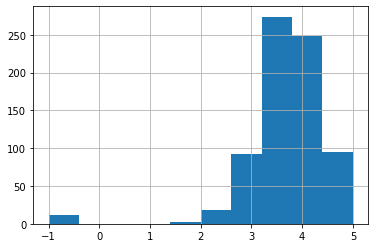

In [10]:
#histogram
df['Rating'].hist();

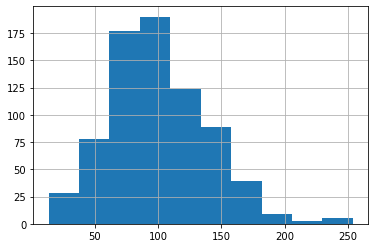

In [6]:
df['avg_salary'].hist();

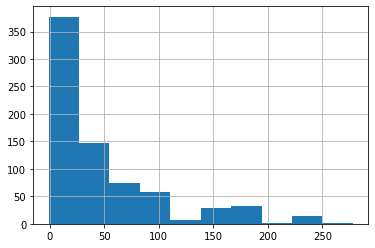

In [7]:
df['age'].hist();

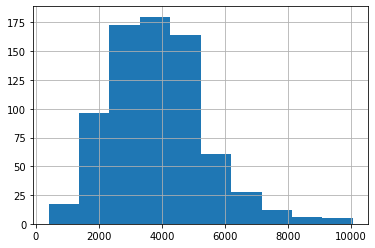

In [8]:
df['desc_len'].hist();

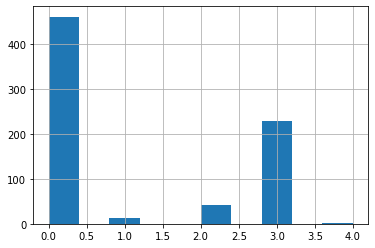

In [9]:
df['competitors_count'].hist();

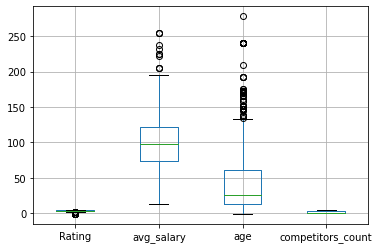

In [13]:
#boxplot
df.boxplot(column=['Rating', 'avg_salary', 'age', 'competitors_count']); #age and avg_salary outlier values 

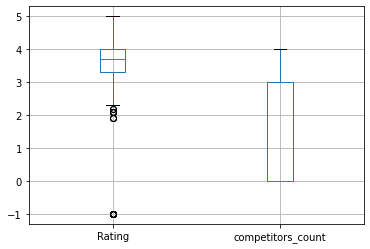

In [14]:
df.boxplot(column=['Rating', 'competitors_count']);

In [32]:
corr = df[['Rating', 'avg_salary', 'age', 'competitors_count','desc_len']].corr()

In [33]:
corr

,Rating,avg_salary,age,competitors_count,desc_len
Rating,1.000000,0.013492,0.024665,0.027190,-0.012281
avg_salary,0.013492,1.000000,0.019492,0.093813,0.078808
age,0.024665,0.019492,1.000000,0.128272,0.164461
competitors_count,0.027190,0.093813,0.128272,1.000000,0.104620
desc_len,-0.012281,0.078808,0.164461,0.104620,1.000000


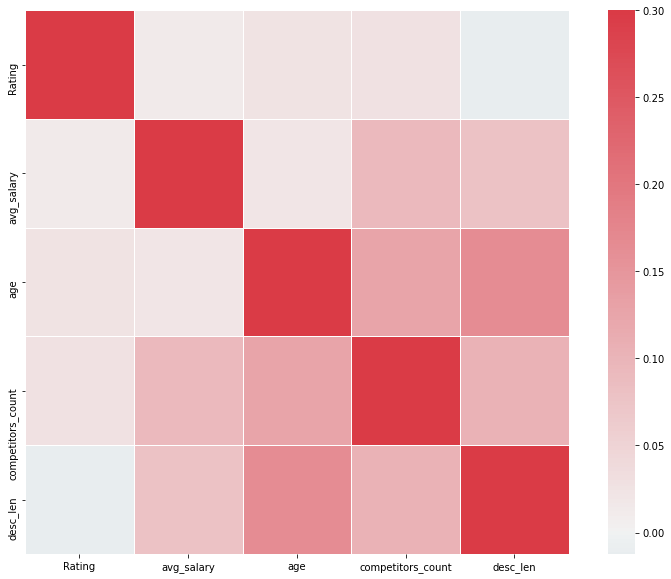

In [34]:
plt.subplots(figsize = (14,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax = .3, center = 0, square=True, linewidths=.5);

In [39]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provider', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'competitors_count'],
      dtype='object')

In [41]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'same_state','python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority']]

In [49]:
df_cat['Location'].value_counts().index

Index(['New York, NY', 'San Francisco, CA', 'Cambridge, MA', 'Chicago, IL',
       'Boston, MA', 'San Jose, CA', 'Pittsburgh, PA', 'Rockville, MD',
       'Washington, DC', 'Herndon, VA',
       ...
       'San Ramon, CA', 'Holyoke, MA', 'Oak Ridge, TN', 'Chattanooga, TN',
       'Miami, FL', 'Woburn, MA', 'Longmont, CO', 'Framingham, MA',
       'Arvada, CO', 'Birmingham, AL'],
      dtype='object', length=200)

In [50]:
df_cat['Location'].value_counts()

New York, NY         55
San Francisco, CA    49
Cambridge, MA        47
Chicago, IL          32
Boston, MA           23
                     ..
Woburn, MA            1
Longmont, CO          1
Framingham, MA        1
Arvada, CO            1
Birmingham, AL        1
Name: Location, Length: 200, dtype: int64

graph for Location: total = 200


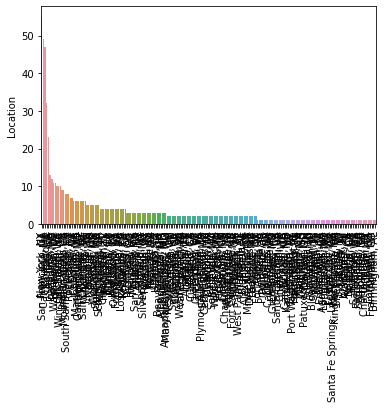

graph for Headquarters: total = 198


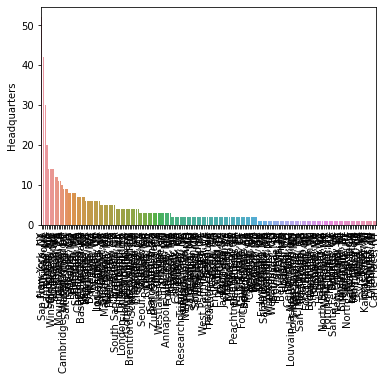

graph for Size: total = 9


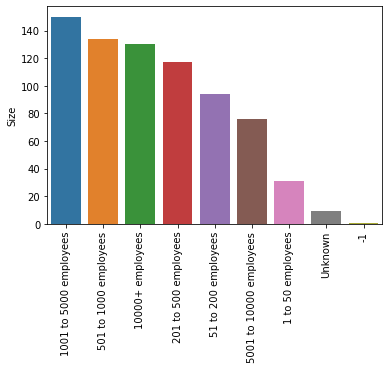

graph for Type of ownership: total = 11


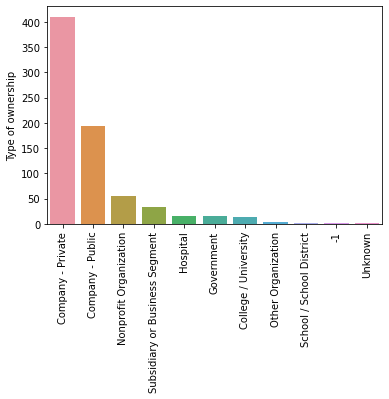

graph for Industry: total = 60


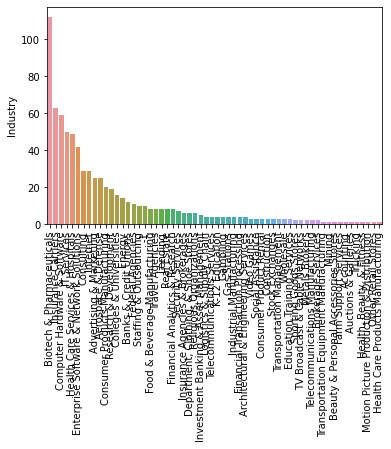

graph for Sector: total = 25


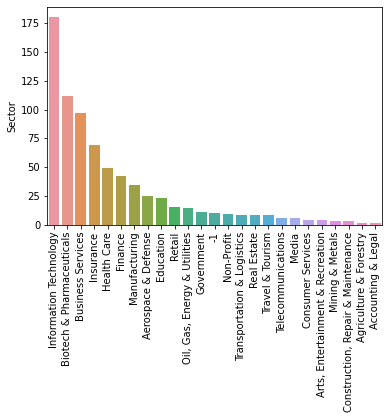

graph for Revenue: total = 14


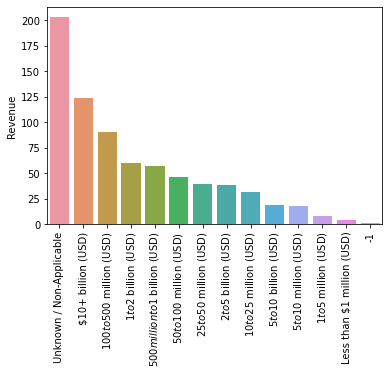

graph for company_txt: total = 343


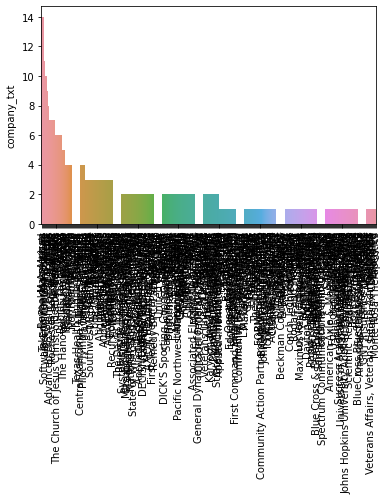

graph for job_state: total = 37


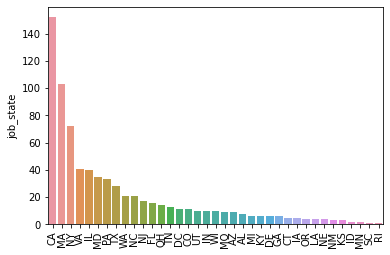

graph for same_state: total = 2


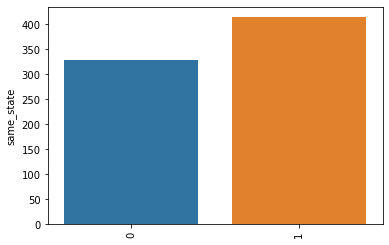

graph for python_yn: total = 2


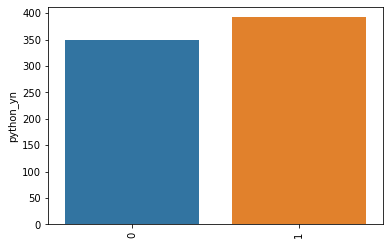

graph for r_studio_yn: total = 2


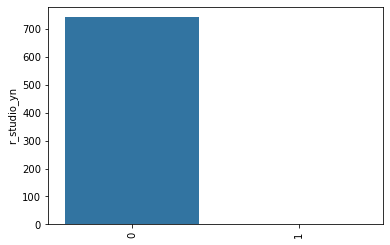

graph for spark_yn: total = 2


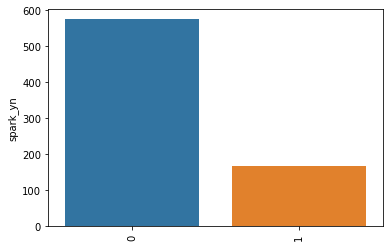

graph for aws_yn: total = 2


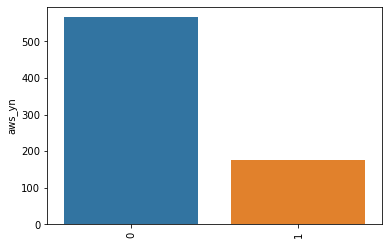

graph for excel_yn: total = 2


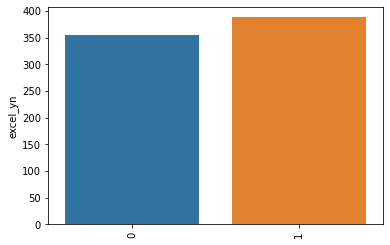

graph for job_simp: total = 7


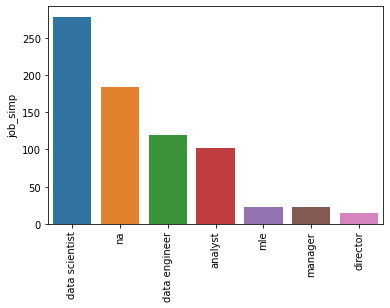

graph for seniority: total = 3


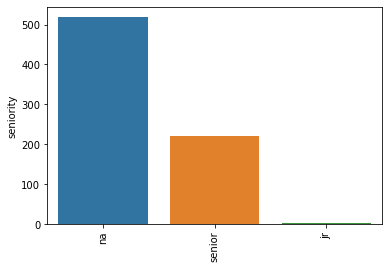

In [61]:
#number of cat variables
for cat in df_cat.columns:
    cat_num = df_cat[cat].value_counts()
    print("graph for %s: total = %d" % (cat, len(cat_num)))
    bar = sns.barplot(x = cat_num.index, y = cat_num,);
    bar.set_xticklabels(bar.get_xticklabels(), rotation =90)
    plt.show();

graph for company_txt: total = 20


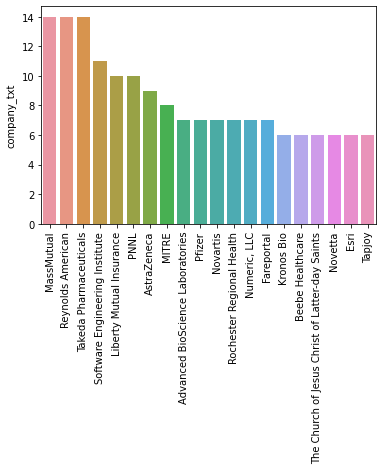

graph for Headquarters: total = 20


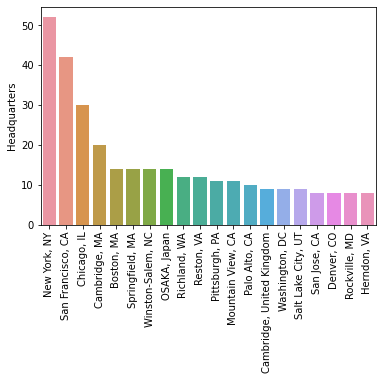

graph for Location: total = 20


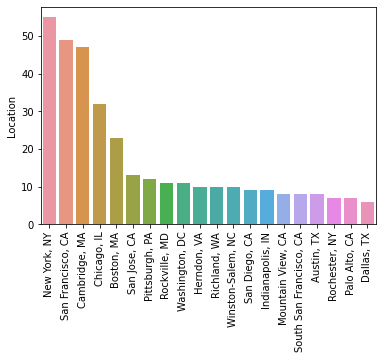

In [62]:
for cat in df_cat[['company_txt', 'Headquarters', 'Location']].columns:
    cat_num = df_cat[cat].value_counts()[:20]
    print("graph for %s: total = %d" % (cat, len(cat_num)))
    bar = sns.barplot(x = cat_num.index, y = cat_num,);#number of cat variables
    bar.set_xticklabels(bar.get_xticklabels(), rotation =90)
    plt.show();

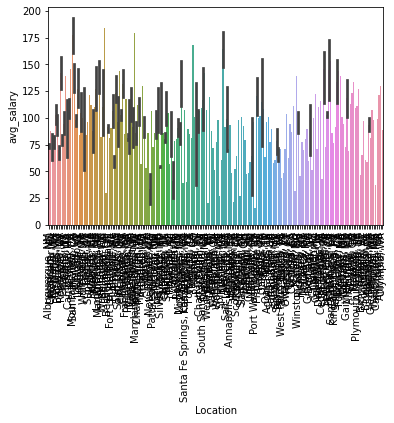

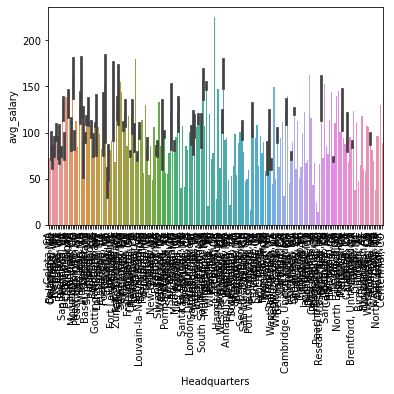

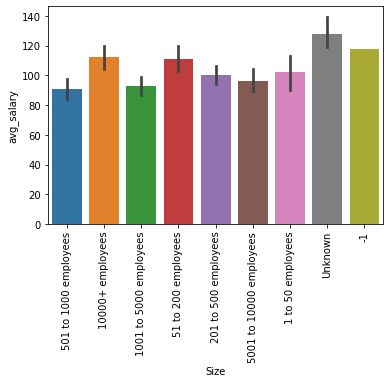

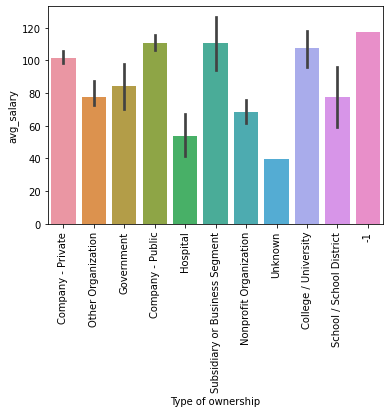

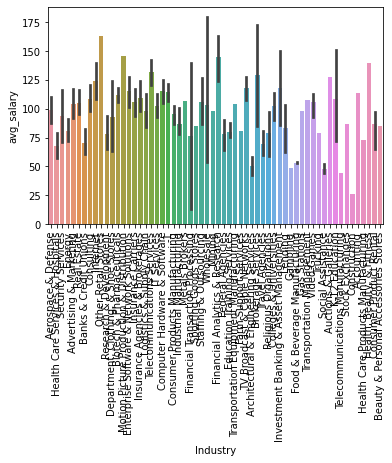

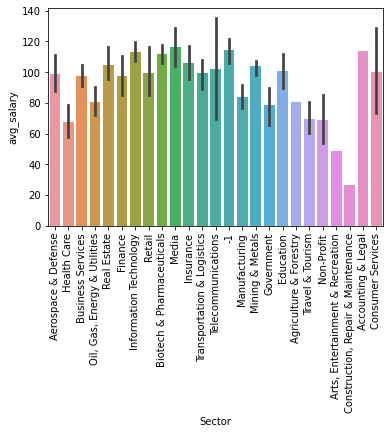

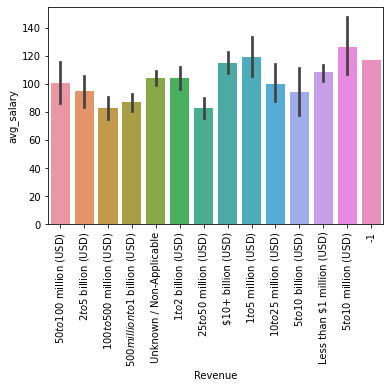

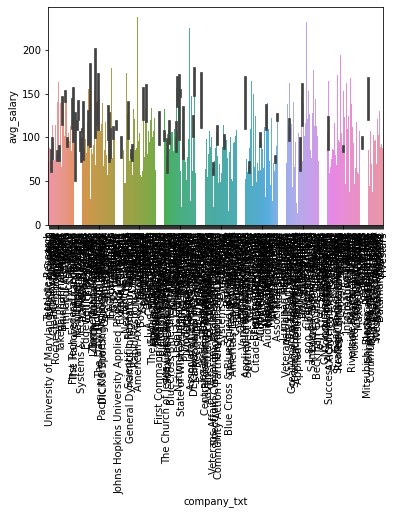

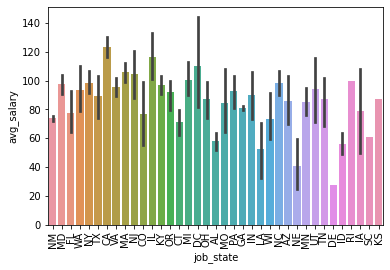

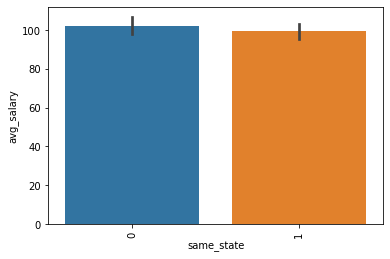

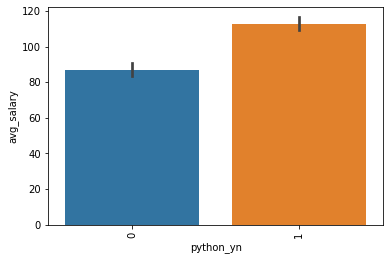

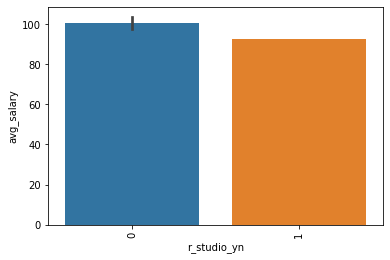

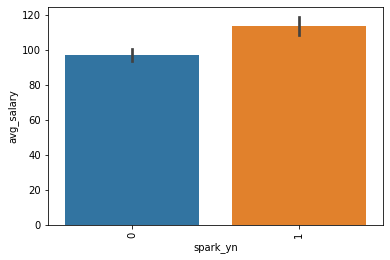

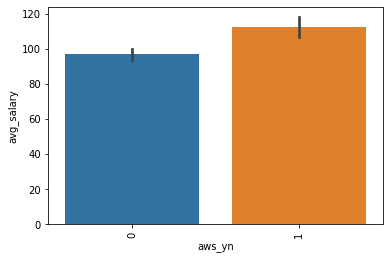

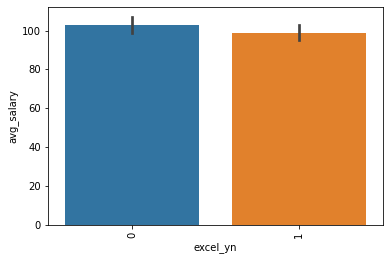

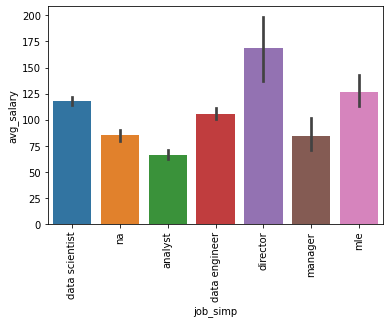

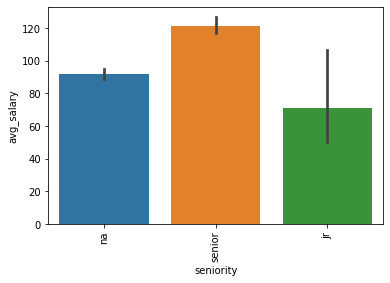

In [55]:
#avg price in the cat variables
for cat in df_cat.columns:
    bar = sns.barplot(x = cat, y = 'avg_salary', data=df); 
    bar.set_xticklabels(bar.get_xticklabels(), rotation =90)
    plt.show();

In [ ]:
pd.pivot_table(df, index='job_simp', values='avg_salary')

In [ ]:
pd.pivot_table(df, index='seniority', values='avg_salary')

In [75]:
pd.pivot_table(df, index=['job_simp','seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          53.250000
               na          61.308219
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [77]:
pd.pivot_table(df, index='Revenue', columns='python_yn', values='avg_salary', aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


# 5.Model Building

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

In [5]:
df = pd.read_csv('salary_data_cleaned.csv', index_col=0)
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provider', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'competitors_count'],
      dtype='object')

In [6]:
#choose relevant columns
df_model = df[['Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'competitors_count', 'hourly', 'employer_provider', 
                'job_state', 'same_state', 'age', 'python_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp','seniority','desc_len', 'avg_salary']] 

In [7]:
df_model.head()

,Rating,Size,Type of ownership,Industry,Sector,Revenue,competitors_count,hourly,employer_provider,job_state,same_state,age,python_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority,desc_len,avg_salary
0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,NM,0,49,1,0,0,1,data scientist,na,2536,72.0
1,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,MD,0,38,1,0,0,0,data scientist,na,4783,87.5
2,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,0,FL,1,12,1,1,0,1,data scientist,na,3461,85.0
3,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,WA,1,57,1,0,0,0,data scientist,na,3883,76.5
4,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,NY,1,24,1,0,0,1,data scientist,na,2728,114.5


In [8]:
#get dummy data
df_dum = pd.get_dummies(df_model)

In [9]:
df_dum.shape

(742, 178)

In [10]:
df_dum.to_csv('salary_model_data.csv')

In [65]:
#train test split
X = df_dum.drop(columns=['avg_salary'])
y = df_dum['avg_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
print(X_train.shape, X_test.shape)

(593, 177) (149, 177)


In [67]:
#multiple linear regression
X_train_sm = sm.add_constant(X_train)

ols_model = sm.OLS(y_train, X_train_sm)
ols_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     8.157
Date:                Sat, 09 Apr 2022   Prob (F-statistic):           6.19e-66
Time:                        16:06:52   Log-Likelihood:                -2630.8
No. Observations:                 593   AIC:                             5544.
Df Residuals:                     452   BIC:                             6162.
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                37.7153      6.061      6.222      0.000      25.803      49.627
Rating                                                3.7028      2.323      1.594      0.112      -0.863       8.269
competitors_count                                     2.5825      1.008      2.563      0.011       0.602       4.562
hourly                                              -44.8427     10.705     -4.189      0.000     -65.880     -23.805
employer_provider                                    25.5764     14.735      1.736      0.083      -3.381      54.534
same_state                                            1.6389      3.032      0.541      0.589      -4.320       7.598
age                                                   0.0546      0.035      1.579      0.115      -0.013       0.123
python_yn                                             9.1390      2.861      3.195      0.001       3.517      14.761
spark_yn                                             -4.7048      3.400     -1.384      0.167     -11.387       1.978
aws_yn                                                3.3145      3.133      1.058      0.291      -2.843       9.472
excel_yn                                              0.5796      2.651      0.219      0.827      -4.631       5.790
desc_len                                             -0.0007      0.001     -0.743      0.458      -0.002       0.001
Size_-1                                              13.8818      8.844      1.570      0.117      -3.499      31.262
Size_1 to 50 employees                                4.7095      7.455      0.632      0.528      -9.941      19.360
Size_10000+ employees                                -9.1089      6.972     -1.307      0.192     -22.810       4.592
Size_1001 to 5000 employees                           4.5633      4.441      1.027      0.305      -4.165      13.291
Size_201 to 500 employees                             0.3646      4.397      0.083      0.934      -8.277       9.006
Size_5001 to 10000 employees                         -4.5244      6.383     -0.709      0.479     -17.069       8.020
Size_501 to 1000 employees                            3.0743      4.680      0.657      0.512      -6.122      12.271
Size_51 to 200 employees                              5.2275      4.916      1.063      0.288      -4.434      14.889
Size_Unknown                                         19.5276     16.252      1.202      0.230     -12.411      51.466
Type of ownership_-1                                 13.8818      8.844      1.570      0.117      -3.499      31.262
Type of ownership_College / University               -2.3248     20.457     -0.114      0.910     -42.527      37.877
Type of ownersh

In [68]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
cross_val_score(lr_model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3)

array([-20.16688387, -19.71146139, -22.42900336])

In [69]:
lr_model.score(X_train, y_train)

0.7164274162887767

In [70]:
#lasso regression
#gridsearch cross validation
l_model = Lasso(alpha=0.13)
l_model.fit(X_train, y_train)
cross_val_score(l_model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3)

array([-19.9006664 , -18.58449355, -19.29770502])

In [71]:
l_model.score(X_train, y_train)

0.6457860596846998

In [72]:
#random forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
cross_val_score(rf_model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3)

array([-16.29141414, -15.20174242, -14.10373096])

In [73]:
rf_model.score(X_train, y_train)

0.9599761978360074

In [82]:
#tune models (gridsearch cross validation)
parameters = {'n_estimators':range(10,300,10), 'criterion': ['mse', 'mae'], 'max_features': ['auto', 'sqrt', 'log2'], 'random_state': [42]}

rf = RandomForestRegressor()

rf_grid = GridSearchCV(rf, parameters, scoring = 'neg_mean_absolute_error', cv = 3)
rf_grid.fit(X_train, y_train)

C:\Users\tolga\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\tolga\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\tolga\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\tolga\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\tolga\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:388: FutureWarning: C

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(10, 300, 10),
                         'random_state': [42]},
             scoring='neg_mean_absolute_error')

In [83]:
rf_grid.best_score_

-14.935006687005417

In [84]:
rf_grid.best_params_

{'criterion': 'mse',
 'max_features': 'auto',
 'n_estimators': 80,
 'random_state': 42}

In [85]:
rf_grid.best_estimator_

RandomForestRegressor(criterion='mse', n_estimators=80, random_state=42)

In [86]:
#test ensembles
pred_lr_model = lr_model.predict(X_test)
pred_l_model = l_model.predict(X_test)
pred_rf_model = rf_grid.best_estimator_.predict(X_test)

In [87]:
mean_absolute_error(y_test, pred_lr_model)

219809319.58653286

In [88]:
mean_absolute_error(y_test, pred_l_model)

19.833927384786065

In [89]:
mean_absolute_error(y_test, pred_rf_model)

11.081543624161075

# 6.Putting the Model into Production

In [5]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('salary_model_data.csv', index_col=0)
df.head()

,Rating,competitors_count,hourly,employer_provider,same_state,age,python_yn,spark_yn,aws_yn,excel_yn,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,3.8,0,0,0,0,49,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,3.4,0,0,0,0,38,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,4.8,0,0,0,1,12,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
3,3.8,3,0,0,1,57,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,2.9,3,0,0,1,24,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [7]:
X = df.drop(columns=['avg_salary'])
y = df['avg_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#useable other program (pickle)
pickl = {'model':rf_grid.best_estimator_}
pickle.dump(pickl, open('model_file' + ".p","wb"))

In [3]:
#load model
with open("model_file.p", 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']